# Climate dataset

This dataset is composed of two different wikipedia tables (link below) that gives for every country the average yearly temperature and the avergae precipitation per year. In total 175 countries are described in this dataset. 


https://en.wikipedia.org/wiki/List_of_countries_by_average_annual_precipitation

https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# precipitation = precipitation.dropna()
# temperature = temperature.dropna()

precipitation_dataset = "data/Precipitation_per_year.csv"
temperature_dataset = "data/average_yearly_temp.csv"
import geopandas as gpd

In [3]:
def get_climate_data(precipitation_dataset, temperature_dataset):
    precipitation = pd.read_csv(precipitation_dataset)
    temperature = pd.read_csv(temperature_dataset)
    climate = pd.merge(
        precipitation,
        temperature,
        on="Country",
    )
    climate = climate.drop(columns=["Rank", "Continent"])
    climate = climate.rename(
        columns={
            "Average yearly temperature (1961–1990 Celsius)": "avg_yearly_temperature",
            "Average precipitation (mm in depth per year)": "avg_yearly_precipitation",
        }
    )
    # convert string columns to float columns
    climate.avg_yearly_temperature = pd.to_numeric(
        climate.avg_yearly_temperature, errors="raise", downcast="float"
    )
    climate.avg_yearly_precipitation = pd.to_numeric(
        climate.avg_yearly_precipitation, errors="raise", downcast="float"
    )

    # delete spaces before and after country names
    climate["Country"] = climate["Country"].str.strip()
    # replace 'United States' with 'United States of America'
    climate["Country"] = climate["Country"].str.replace(
        "United States", "United States of America"
    )

    return climate

## Visualization of the dataset

In [4]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

C:\Users\Admin\AppData\Local\Temp\ipykernel_23184\3912264495.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [5]:
climate = get_climate_data(precipitation_dataset, temperature_dataset)
climate = climate.merge(world, right_on="name", left_on="Country", how="left")

In [6]:
climate = get_climate_data(precipitation_dataset, temperature_dataset)
world = world.merge(climate, left_on="name", right_on="Country", how="left")

In [7]:
climate.isna().sum()

Country                     0
avg_yearly_precipitation    0
avg_yearly_temperature      0
dtype: int64

In [8]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,avg_yearly_precipitation,avg_yearly_temperature
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2592.0,24.40
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,1071.0,22.35
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,537.0,-5.10
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,715.0,8.55
...,...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,NaN
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,2200.0,25.75


In [9]:
print(world.name.values)

['Fiji' 'Tanzania' 'W. Sahara' 'Canada' 'United States of America'
 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea' 'Indonesia' 'Argentina'
 'Chile' 'Dem. Rep. Congo' 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti'
 'Dominican Rep.' 'Russia' 'Bahamas' 'Falkland Is.' 'Norway' 'Greenland'
 'Fr. S. Antarctic Lands' 'Timor-Leste' 'South Africa' 'Lesotho' 'Mexico'
 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia' 'Panama' 'Costa Rica'
 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala' 'Belize' 'Venezuela'
 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico' 'Jamaica' 'Cuba'
 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali' 'Mauritania' 'Benin'
 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana' "Côte d'Ivoire" 'Guinea'
 'Guinea-Bissau' 'Liberia' 'Sierra Leone' 'Burkina Faso'
 'Central African Rep.' 'Congo' 'Gabon' 'Eq. Guinea' 'Zambia' 'Malawi'
 'Mozambique' 'eSwatini' 'Angola' 'Burundi' 'Israel' 'Lebanon'
 'Madagascar' 'Palestine' 'Gambia' 'Tunisia' 'Algeria' 'Jordan'
 'United Arab Emirates' 'Qatar' 'Kuwait'

In [10]:
climate[climate.pop_est.isna()]

AttributeError: 'DataFrame' object has no attribute 'pop_est'

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title("Yearly Temperature by Country [C°]")
ax.set_axis_off()

# Plot the data using GeoPandas plot function
world.boundary.plot(ax=ax, linewidth=1, color="black")  # Draw country boundaries
world.plot(
    column="avg_yearly_temperature",
    ax=ax,
    legend=True,
    cmap="Blues",
)
plt.show()

NameError: name 'plt' is not defined

KeyError: 'Averge precipitation [mm/year]'

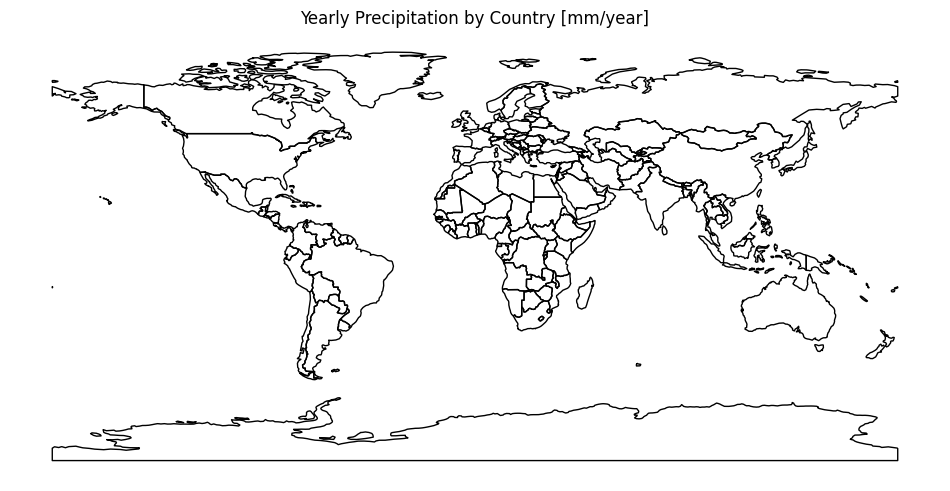

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title("Yearly Precipitation by Country [mm/year]")
ax.set_axis_off()

# Plot the data using GeoPandas plot function
world.boundary.plot(ax=ax, linewidth=1, color="black")  # Draw country boundaries
world.plot(column="Averge precipitation [mm/year]", ax=ax, legend=True, cmap="Blues")
plt.show()